# Airline On-Time and Delay Causes Data Analysis and Visualization

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>    
<li><a href="#explore">Data Exploration</a></li>  
    <ul>
            <li><a href="#univar">Univariate Exploration</a></li>
            <li><a href="#bivar">Bivariate Exploration</a></li>
            <li><a href="#multivar">Multivariate Exploration</a></li>
    </ul>
</ul>

<a id='intro'></a>
# Introduction

> The Bureau of Transportation Statistics provides a CSV raw data to download. This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2004 to 2019. 

Data Resource Page: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp

### The Information of each Label Name
<ol>
    <li>year -- The year of the month occured</li>
    <li>month -- The month for which data was collected</li>
    <li>carrier -- The airline code</li>
    <li>carrier_name -- The airline name</li>
    <li>airport -- The airport code</li>
    <li>airport_name -- The airport name</li>
    <li>arr_flights -- # of flights that arrived at the airport</li>
    <li>arr_del15 -- # of flights that arrived >= 15 minutes late
</li>
    <li>carrier_ct -- # of flights delayed due to the carrier
</li>
    <li>weather_ct -- # of flights delayed due to weather
</li>
    <li>nas_ct -- # of flights delayed due to national air system
</li>
    <li>security_ct -- # of flights delayed due to security
</li>
    <li>late_aircraft_ct -- # flights delayed because a previous flight using the same aircraft was late
</li>
    <li>arr_cancelled -- # of canceled arrivals
</li>
    <li>arr_diverted -- # of scheduled arrivals that were diverted
</li>
    <li>arr_delay -- Sum of the delay minutes
</li>
    <li>carrier_delay -- Total minutes of delays due to carriers
</li>
    <li>weather_delay -- Total minutes of delays due to weather
</li>
    <li>nas_delay -- Total minutes of delays due to natl. air service
</li>
    <li>security_delay -- Total minutes of delays due to security
</li>
    <li>late_aircraft_delay -- Similar to late_aircraft_ct. The total minutes of delay due to a previous flight using the same aircraft arriving late.
</li>
</ol>
    

In [70]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

<a id='wrangle'></a>
# Data Wrangling

In [71]:
df = pd.read_csv('04_19_airline_delay_causes.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,...,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN


In [72]:
df.shape

(265047, 22)

There are 265047 rows and 22 columns.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265047 entries, 0 to 265046
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 265047 non-null  int64  
 1    month               265047 non-null  int64  
 2   carrier              265047 non-null  object 
 3   carrier_name         265047 non-null  object 
 4   airport              265047 non-null  object 
 5   airport_name         265047 non-null  object 
 6   arr_flights          264681 non-null  float64
 7   arr_del15            264625 non-null  float64
 8   carrier_ct           264681 non-null  float64
 9    weather_ct          264681 non-null  float64
 10  nas_ct               264681 non-null  float64
 11  security_ct          264681 non-null  float64
 12  late_aircraft_ct     264681 non-null  float64
 13  arr_cancelled        264681 non-null  float64
 14  arr_diverted         264681 non-null  float64
 15   arr_delay       

The total rows are 265047, but some labels only have 264681 rows, let's check the null value.

In [74]:
#check with the null value
bool_series = pd.isnull(df['arr_flights'])
missing_df = df[bool_series]
missing_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
1418,2004,2,EV,Atlantic Southeast Airlines,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1427,2004,2,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,2004,2,TZ,ATA Airlines d/b/a ATA,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2804,2004,3,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,2004,3,EV,Atlantic Southeast Airlines,CAK,"Akron, OH: Akron-Canton Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
missing_df.shape[0]

366

There are 366 rows with missing value.

In [76]:
missing_df.year.value_counts()

2008    65
2009    44
2007    33
2006    28
2014    22
2012    21
2013    20
2016    19
2005    18
2018    17
2004    16
2019    14
2010    14
2011    13
2015    12
2017    10
Name: year, dtype: int64

In [79]:
#drop the unnamed:21 column first
df_new = df.drop('Unnamed: 21' , axis = 1)
df_new.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,...,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0


In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265047 entries, 0 to 265046
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 265047 non-null  int64  
 1    month               265047 non-null  int64  
 2   carrier              265047 non-null  object 
 3   carrier_name         265047 non-null  object 
 4   airport              265047 non-null  object 
 5   airport_name         265047 non-null  object 
 6   arr_flights          264681 non-null  float64
 7   arr_del15            264625 non-null  float64
 8   carrier_ct           264681 non-null  float64
 9    weather_ct          264681 non-null  float64
 10  nas_ct               264681 non-null  float64
 11  security_ct          264681 non-null  float64
 12  late_aircraft_ct     264681 non-null  float64
 13  arr_cancelled        264681 non-null  float64
 14  arr_diverted         264681 non-null  float64
 15   arr_delay       

In [81]:
#drop the missing value columns.
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264625 entries, 0 to 265046
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 264625 non-null  int64  
 1    month               264625 non-null  int64  
 2   carrier              264625 non-null  object 
 3   carrier_name         264625 non-null  object 
 4   airport              264625 non-null  object 
 5   airport_name         264625 non-null  object 
 6   arr_flights          264625 non-null  float64
 7   arr_del15            264625 non-null  float64
 8   carrier_ct           264625 non-null  float64
 9    weather_ct          264625 non-null  float64
 10  nas_ct               264625 non-null  float64
 11  security_ct          264625 non-null  float64
 12  late_aircraft_ct     264625 non-null  float64
 13  arr_cancelled        264625 non-null  float64
 14  arr_diverted         264625 non-null  float64
 15   arr_delay       

After cleaning, the data has 264625 rows and all the other columns do not have null value.

In [175]:
#we need to replacec the column name
df_new = df_new.rename(columns = {" month":"month",
                                 " weather_ct":"weather_ct",
                                 " arr_delay":"arr_delay",
                                 " carrier_delay":"carrier_delay"}) 

In [176]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264625 entries, 0 to 265046
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 264625 non-null  int64  
 1   month                264625 non-null  int64  
 2   carrier              264625 non-null  object 
 3   carrier_name         264625 non-null  object 
 4   airport              264625 non-null  object 
 5   airport_name         264625 non-null  object 
 6   arr_flights          264625 non-null  float64
 7   arr_del15            264625 non-null  float64
 8   carrier_ct           264625 non-null  float64
 9   weather_ct           264625 non-null  float64
 10  nas_ct               264625 non-null  float64
 11  security_ct          264625 non-null  float64
 12  late_aircraft_ct     264625 non-null  float64
 13  arr_cancelled        264625 non-null  float64
 14  arr_diverted         264625 non-null  float64
 15  arr_delay        

<a id='explore'></a>
# Data Exploration
<a id='univar'></a>
## Univariate Exploration
### What is the proportion of per carrier?

In [129]:
#list all carrier name
df_new['carrier_name'].value_counts()

SkyWest Airlines Inc.           31132
ExpressJet Airlines Inc.        23886
Delta Air Lines Inc.            23306
American Airlines Inc.          16259
United Air Lines Inc.           15899
American Eagle Airlines Inc.    14724
Southwest Airlines Co.          14329
Mesa Airlines Inc.              11933
Atlantic Southeast Airlines     11471
Alaska Airlines Inc.            10521
US Airways Inc.                 10278
JetBlue Airways                  9706
Frontier Airlines Inc.           9528
Comair Inc.                      7685
Northwest Airlines Inc.          7310
AirTran Airways Corporation      6687
Pinnacle Airlines Inc.           6434
Continental Air Lines Inc.       6342
Envoy Air                        5796
Endeavor Air Inc.                3044
Hawaiian Airlines Inc.           3030
Allegiant Air                    2836
Spirit Air Lines                 2320
PSA Airlines Inc.                2230
Republic Airline                 2127
Virgin America                   1425
America West

In [136]:
type_order = df_new['carrier_name'].value_counts().index

#define color
base_color = sns.color_palette()[4]

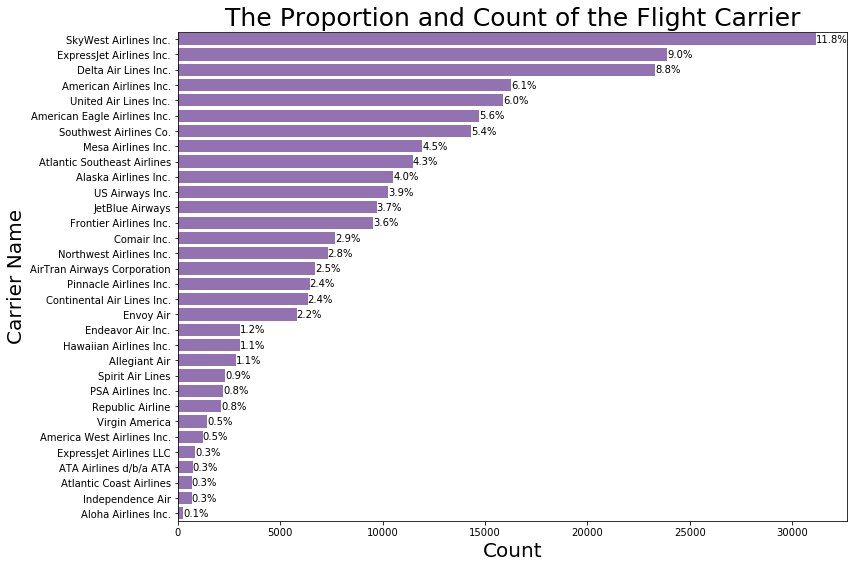

In [137]:
plt.figure(figsize = [12, 9])
sns.countplot(data = df_new, y = 'carrier_name', color = base_color, order = type_order);
plt.title('The Proportion and Count of the Flight Carrier', fontsize = 25)
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Carrier Name', fontsize = 20);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_new.shape[0])
    plt.text(count+1, i, pct_string, va='center');

Through the bar chart, we know that the first largest flight carrier proportion is SkyWest Airlines Inc accounting for 11.8%. The company has 31132 business branches in U.S. domestic airlines. The second and third ones are Expressjet Airlines Inc. and Delta Air Lines Inc. with 9% and 8.8% respectively. Aloha Airlines Inc. contains less flight carrier proportion.

### What is the average canceled flight for each month?

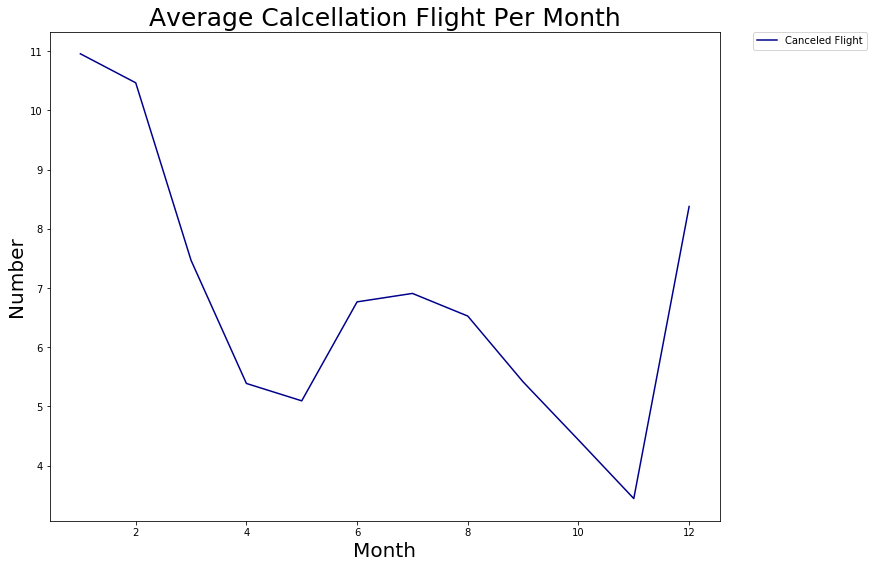

In [431]:
#get and sort the unique year
y = sorted(df_new['month'].unique())

#loop canceled flight number by month
cancel_by_month = [df_new[df_new['month'] == i]['arr_cancelled'].mean() for i in y]
fig, ax = plt.subplots(figsize = [12, 9])

#build line a chart
ax.plot(y, cancel_by_month, label = 'Canceled Flight', color = 'darkblue');

#set title and labels
plt.title('Average Calcellation Flight Per Month', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number', fontsize = 20);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In January, lights were canceled most and more specifically there were 11 canceled flights. And the month of November had least flight cancellation with only 2 were canceled. 

<a id='bivar'></a>
## Bivariate Exploration
### What is the relationship between arrived flight and delayed flight by each month?

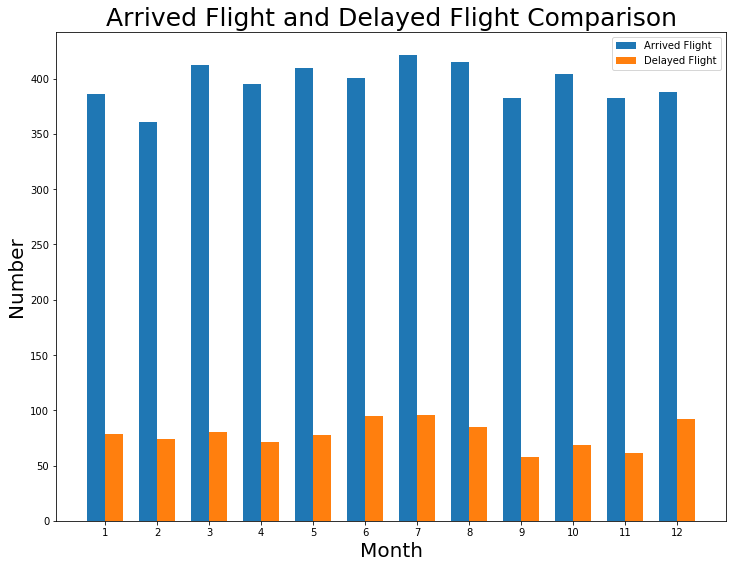

In [281]:
#get and sort the unique month
N = 12
y = sorted(df_new['month'].unique())
#mean for the flight number by month
arrflight_by_year = [df_new[df_new['month'] == i]['arr_flights'].mean() for i in y]
delay_by_year = [df_new[df_new['month'] == i]['arr_del15'].mean() for i in y]

#build a bar chart for two labels
fig, ax = plt.subplots(figsize = [12, 9])
ind = np.arange(N)
width = 0.35
p1 = ax.bar(ind, arrflight_by_year, width)
p2 = ax.bar(ind+width, delay_by_year, width)

ax.set_xticks(ind+width/2)
ax.set_xticklabels(y)

#add labels
plt.title('Arrived Flight and Delayed Flight Comparison', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number', fontsize = 20);
plt.legend((p1[0], p2[0]), ('Arrived Flight', 'Delayed Flight'));

The bar chart shows the mean flight number each month separately. March and July are two peak amount of flight. These two periods are also around the time school's enrollment day. February and September are the flight companies' offseason. Not as many flights as other months. The delayed flight number floats along with an arrived flight number at 75 average per month.

<a id='multivar'></a>
## Multivariate Exploration
### How is the trend for different flight situation by year?

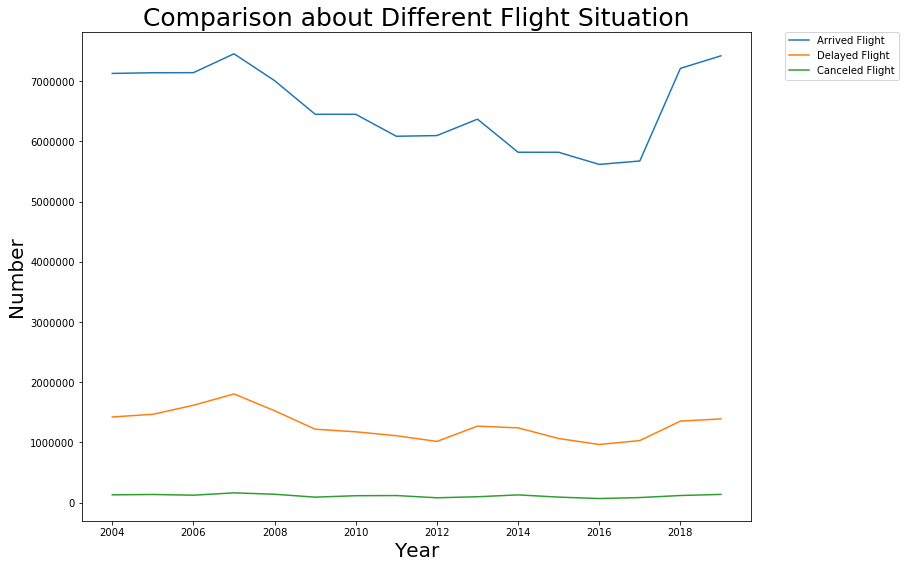

In [264]:
#get and sort the unique year
y = sorted(df_new['year'].unique())
#sum for the flight number by years
arrflight_by_year = [df_new[df_new['year'] == i]['arr_flights'].sum() for i in y]
delay_by_year = [df_new[df_new['year'] == i]['arr_del15'].sum() for i in y]
cancel_by_year = [df_new[df_new['year'] == i]['arr_cancelled'].sum() for i in y]

#build a chart
fig, ax = plt.subplots(figsize = [12, 9])
ax.plot(y, arrflight_by_year, label = 'Arrived Flight');
ax.plot(y, delay_by_year, label = 'Delayed Flight');
ax.plot(y, cancel_by_year, label = 'Canceled Flight');
#add labels
plt.title('Comparison about Different Flight Situation', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number', fontsize = 20);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

From 2004 to 2019, there are two peaks for arrived flight number. One was in the year of 2007, the other one was nearly 2019. The lowest number of the arrived flight was in 2017, it means that the flight company had less business than before. The trend of flight business decline was from 2007, it was a smooth decreasing until 2017, the trend started increasing rapidly.

The delayed flight trend followed by arrived flight trends. When there are more arrived flights, the number of delayed flights would rise, vice versa. The canceled flight trend is always smooth not fluctuate like arrived flight line and delayed flight line. 

### What is the proportion of delayed flight in different reason?

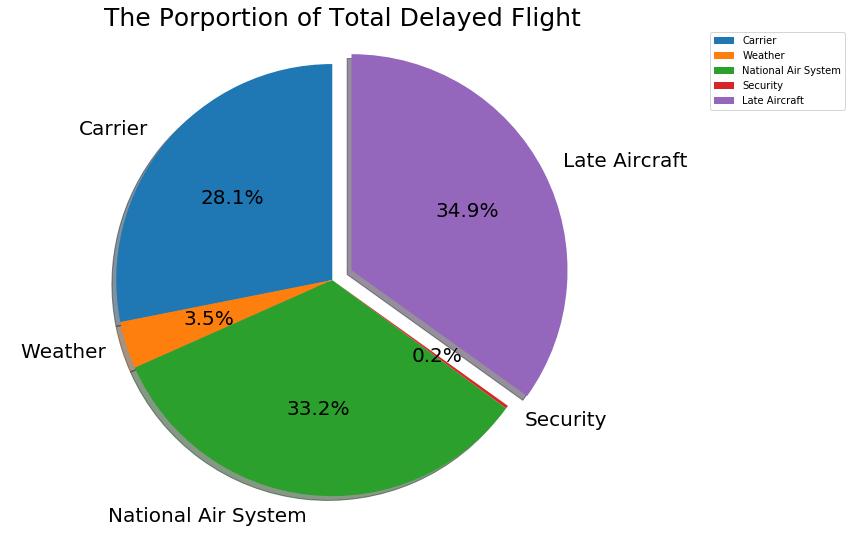

In [422]:
#add labels names
labels = 'Carrier', 'Weather', 'National Air System', 'Security', 'Late Aircraft'

#calculate the total minutes of delay
carrier_delay_sum = df_new.carrier_ct.sum()
weather_delay_sum = df_new.weather_ct.sum()
nas_delay_sum = df_new.nas_ct.sum()
security_delay_sum = df_new.security_ct.sum()
late_aircraft_delay_sum = df_new.late_aircraft_ct.sum()
arr_delay_sum = df_new.arr_del15.sum()

#import proportion about each part
sizes = [carrier_delay_sum/arr_delay_sum, weather_delay_sum/arr_delay_sum, 
         nas_delay_sum/arr_delay_sum, security_delay_sum/arr_delay_sum, 
         late_aircraft_delay_sum/arr_delay_sum]
explode = (0, 0, 0, 0, 0.1) 
#create a pie chart
fig1, ax1 = plt.subplots(figsize = [12, 9])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
#make sure pie draw as a circle
ax1.axis('equal')  
plt.title('The Porportion of Total Delayed Flight', fontsize = 25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.show()


34.9% of delayed situation was due to the previous flight which was the same aircraft arrived late. And the second largest proportion delayed reason was due to the national air system. And the third one was carrier. It was less likely that the flight would be delayed due to security and weather. So, Flight is safe at a large scale and weather will not be a big problem for aviation.    

### How many hours should be waited for delayed flight in different reason?

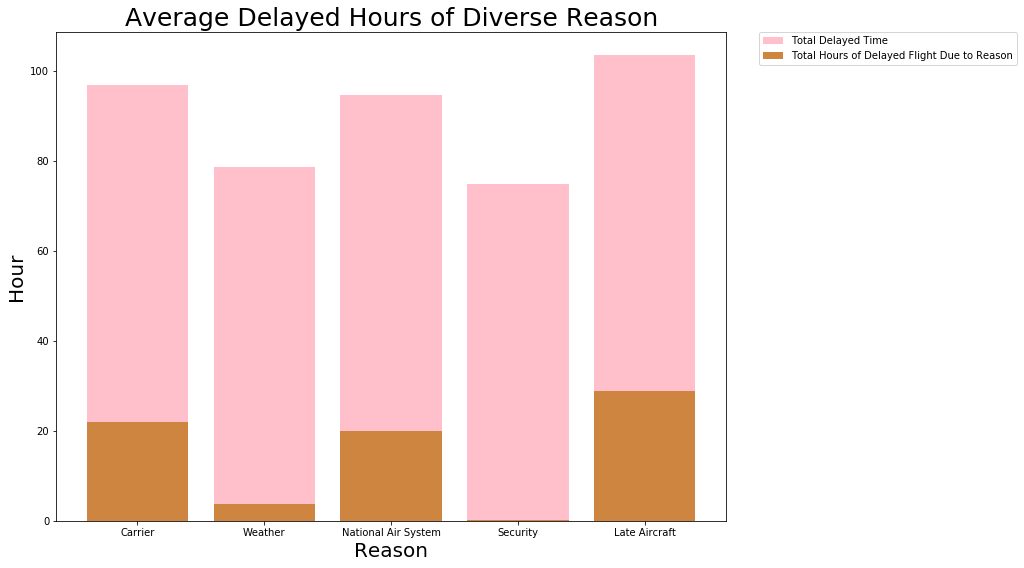

In [429]:
#set labels
plt.figure(figsize = [12, 9])
x = ['Carrier', 'Weather', 'National Air System', 'Security', 'Late Aircraft']

#calculate the mean minutes of delayed time
carrier_delay_mean = df_new.carrier_delay.mean()
weather_delay_mean = df_new.weather_delay.mean()
nas_delay_mean = df_new.nas_delay.mean()
security_delay_mean = df_new.security_delay.mean()
late_aircraft_delay_mean = df_new.late_aircraft_delay.mean()
arr_delay_mean = df_new.arr_delay.mean()
bronzes =  [carrier_delay_mean/60, weather_delay_mean/60, nas_delay_mean/60, security_delay_mean/60, late_aircraft_delay_mean/60]
pink =[arr_delay_mean/60, arr_delay_mean/60, arr_delay_mean/60, arr_delay_mean/60, arr_delay_mean/60]

ind = [i for i, _ in enumerate(x)]

#create the bar chart
plt.bar(ind, pink, width=0.8, label='Total Delayed Time', color='Pink', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='Total Hours of Delayed Flight Due to Reason', color='#CD853F')

#set the title and labels
plt.xticks(ind, x)
plt.title("Average Delayed Hours of Diverse Reason", fontsize = 25)
plt.ylabel("Hour", fontsize = 20)
plt.xlabel("Reason", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.show()

From this bar chart, the customers might need to wait for 30 hours for their flights that delayed because of late aircraft. Besides, they would wait for around 20 hours for the reason of carrier and national air system. Last, only 3 hours was needed to be wait due to weather reason.  